<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-объявлений-о-продаже-квартир" data-toc-modified-id="Исследование-объявлений-о-продаже-квартир-1">Исследование объявлений о продаже квартир</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1.1">Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2">Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-1.3">Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.4">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь,-цена,-число-комнат,-высота-потолков." data-toc-modified-id="Площадь,-цена,-число-комнат,-высота-потолков.-1.4.1">Площадь, цена, число комнат, высота потолков.</a></span></li><li><span><a href="#Время-продажи-квартиры." data-toc-modified-id="Время-продажи-квартиры.-1.4.2">Время продажи квартиры.</a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения." data-toc-modified-id="Редкие-и-выбивающиеся-значения.-1.4.3">Редкие и выбивающиеся значения.</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-1.4.4">Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Средняя-стоимость-квадратного-метра" data-toc-modified-id="Средняя-стоимость-квадратного-метра-1.4.5">Средняя стоимость квадратного метра</a></span></li><li><span><a href="#Квартиры-в-центре-Санкт-Петербурга" data-toc-modified-id="Квартиры-в-центре-Санкт-Петербурга-1.4.6">Квартиры в центре Санкт-Петербурга</a></span></li><li><span><a href="#Анализ-сегмента-квартир-в-центре" data-toc-modified-id="Анализ-сегмента-квартир-в-центре-1.4.7">Анализ сегмента квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-1.5">Общий вывод</a></span></li></ul></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Загрузим файл с данными и ознакомимся с ним.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# импорт библиотеки pandas
# чтение файла с данными и сохранение в df
# получение общей информации о данных в таблице df

df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(df.sample(5))
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11107,6,8000000.0,110.0,2016-07-28T00:00:00,4,NaN,17.0,66.0,1,NaN,...,13.0,0.0,Санкт-Петербург,17209.0,16005.0,1.0,557.0,2.0,830.0,408.0
8709,19,24500000.0,105.0,2017-04-20T00:00:00,2,3.2,6.0,31.1,2,NaN,...,51.0,0.0,Санкт-Петербург,24980.0,3310.0,2.0,445.0,0.0,NaN,159.0
19548,12,11500000.0,73.1,2018-09-09T00:00:00,2,2.7,16.0,43.3,16,NaN,...,14.0,NaN,Санкт-Петербург,50963.0,14975.0,0.0,NaN,0.0,NaN,90.0
12964,1,4900000.0,48.0,2016-03-30T00:00:00,2,NaN,5.0,36.9,5,NaN,...,5.0,0.0,Санкт-Петербург,27517.0,6220.0,3.0,311.0,2.0,430.0,601.0
7985,0,6000000.0,60.0,2016-03-24T00:00:00,3,NaN,9.0,39.0,8,NaN,...,6.0,0.0,Санкт-Петербург,35685.0,11687.0,0.0,NaN,1.0,887.0,102.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Вывод**  

В таблице двадцать два столбца. Тип данных — int64, float64, object, bool.

Согласно документации к данным:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении.

В каждой строке таблицы — данные из объявления о продаже квартиры. Встречаются пропуски в данных, неподходящий тип данных, артефакты.
Сделаем предобработку данных.

## Предобработка данных

In [3]:
# выведем названия столбцов
# переименуем столбцы
df.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest',
                      'parks_around3000' : 'parks_around_3000',
                     'ponds_around3000' : 'ponds_around_3000'}, inplace = True)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
# столбец с ценой приведём к целочисленному значению
df['last_price'] = df['last_price'].astype('int')
df['last_price'].dtypes

dtype('int64')

In [5]:
# столбец с датой конвертируем в формат даты, время везде 00:00:00, можно обойтись только датой
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df['first_day_exposition'].head(1)

0   2019-03-07
Name: first_day_exposition, dtype: datetime64[ns]

In [6]:
# столбец с количеством этажей округлим, оставим float, чтобы не избавляться от nan
df['floors_total'] = round(df['floors_total'],0)
df['floors_total'].head(1)

0    16.0
Name: floors_total, dtype: float64

In [7]:
# заменим пропущенные значения в столбце в высотой потолков на медиану, по группе этажности домов, либо на общую медиану
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby(['floors_total'])['ceiling_height'].transform('median'))
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

In [8]:
# заменим пропущенные значения в столбце с площадью кухни в студиях на нули, т.к. в студиях отсутствует кухня
df.loc[df['studio'] == True, 'kitchen_area'] = 0
df['kitchen_area'].isna().sum()

2129

In [9]:
# заменим пропущенные значения в столбце с количеством балконов на нули, изменим тип данных на целочисленный
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')
df['balcony'].tail(1)

23698    0
Name: balcony, dtype: int64

**Вывод**  

Сделали предобработку данных:
* переименовали столбцы на корректные имена.
* cтолбцы с ценой, количеством этажей, количеством балконов привели к целочисленному типу значений;
* cтолбец с датой привели к специальному типу данных `datatime`.
* пропущенные значения в столбце с высотой потолков заменили на медиану по группе этажности домов, либо на общую медиану;
* пропущенные значения в столбце с площадью кухни в квартирах-студиях заменили на нули, т.к. студия не подразумевает наличие кухни;
* пропущенные значения в столбце с количеством балконов заменили на нули.  

Оставшиеся пропущенные и/или нулевые значения, выбросы в данных можно трактовать сильно по-разному, поэтому оставим их в текущем виде.
Пропущенные значения в столбцах с названием населённого пункта и расстоянием до центра города достоверно добыть из этой базы данных нет возможности, но эти строки могут нести полезные данные, поэтому оставим.  
Пропущенные значения в столбцах: с аппартаментами, расстоянием до озера, парка, аэропорта; числом парков и озёр в радиусе 3км; жилой площади и площади кухни; с количеством дней размещения объявления, - в дальнейшем анализе использовать не будем, поэтому оставим как есть.

## Расчёты и добавление результатов в таблицу

In [10]:
# рассчитаем и добавим в таблицу столбец с ценой за квадратный метр, округлим до целочисленного
df['price_sqft'] = df['last_price'] / df['total_area']
df['price_sqft'] = df['price_sqft'].astype('int')
df['price_sqft'].head(1)

0    120370
Name: price_sqft, dtype: int64

In [11]:
# добавим в таблицу стобцы с днём недели, месяцем и годом публикации объявления
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqft,weekday_exposition,month_exposition,year_exposition
22354,13,7500000,75.0,2017-11-29,2,2.75,22.0,34.000000,14,NaN,...,16224.0,1.0,226.0,0.0,NaN,55.0,100000,2,11,2017
21434,20,8865000,104.5,2018-05-17,4,3.00,5.0,72.200000,3,NaN,...,8390.0,2.0,566.0,0.0,NaN,169.0,84832,3,5,2018
20427,1,12600000,129.0,2017-05-11,5,2.80,8.0,81.899994,3,False,...,17143.0,1.0,1514.0,2.0,16.0,90.0,97674,3,5,2017
18634,19,5100000,36.8,2019-04-10,1,2.80,16.0,15.000000,16,NaN,...,11838.0,1.0,275.0,0.0,NaN,NaN,138586,2,4,2019
14448,11,7800000,72.0,2018-07-04,3,2.70,6.0,34.500000,6,NaN,...,30710.0,0.0,NaN,1.0,118.0,40.0,108333,2,7,2018


In [12]:
# добавим в таблицу столбец с категориями по этажам квартиры: первый, последний, другой
def floors_id(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой' 
df['floors_id'] = df.apply(floors_id, axis=1)
df.head(-9)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqft,weekday_exposition,month_exposition,year_exposition,floors_id
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.75,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.55,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23685,15,2490000,31.0,2019-01-24,1,2.50,5.0,17.3,5,NaN,...,0.0,NaN,0.0,NaN,NaN,80322,3,1,2019,последний
23686,8,3300000,31.0,2017-04-29,1,2.55,9.0,18.0,6,NaN,...,1.0,140.0,1.0,317.0,193.0,106451,5,4,2017,другой
23687,6,3200000,39.0,2017-12-16,1,2.55,9.0,20.0,6,NaN,...,0.0,NaN,0.0,NaN,38.0,82051,5,12,2017,другой
23688,19,9200000,101.0,2019-04-01,3,3.05,15.0,63.0,12,NaN,...,0.0,NaN,0.0,NaN,23.0,91089,0,4,2019,другой


In [13]:
# посчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_sqft,weekday_exposition,month_exposition,year_exposition,floors_id,living_area_ratio,kitchen_area_ratio
22447,10,4500000,33.0,2017-08-15,1,2.70,25.0,15.0,23,NaN,...,0.0,NaN,498.0,136363,1,8,2017,другой,0.454545,0.242424
1714,0,5200000,68.0,2019-04-19,2,3.00,3.0,39.5,3,NaN,...,0.0,NaN,4.0,76470,4,4,2019,последний,0.580882,0.122059
16782,19,13990000,115.3,2018-10-24,4,2.82,20.0,64.1,5,NaN,...,0.0,NaN,133.0,121335,2,10,2018,другой,0.555941,0.127493
11094,13,10200000,114.8,2018-07-19,3,3.25,5.0,72.0,5,NaN,...,3.0,365.0,264.0,88850,3,7,2018,последний,0.627178,0.100174
8230,10,6200000,55.6,2017-05-04,1,3.10,10.0,23.5,9,NaN,...,0.0,NaN,22.0,111510,3,5,2017,другой,0.422662,0.273381


**Вывод**  

Посчитали и добавили в таблицу:
* цену квадратного метра `df['price_sqft']`;
* день недели, месяц и год публикации объявления `df['weekday_exposition']`, `df['month_exposition']`, `df['year_exposition']`;
* этаж квартиры `df['floors_id']`;
* соотношение жилой и общей площади, а также отношение площади кухни к общей `df['living_area_ratio']`, `df['kitchen_area_ratio']`.

## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков.
Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [14]:
# посмотрим описательную статистику
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348651,6.541549e+06,2.070636,2.735650
std,35.654083,1.088701e+07,1.078405,0.994275
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,100.000000


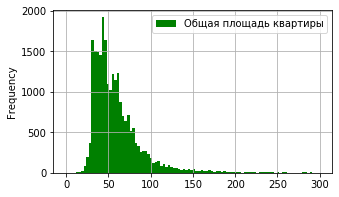

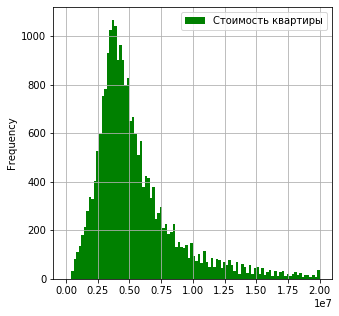

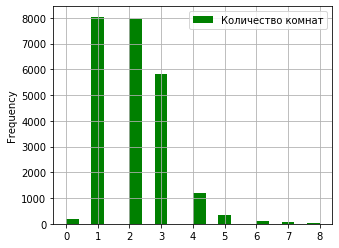

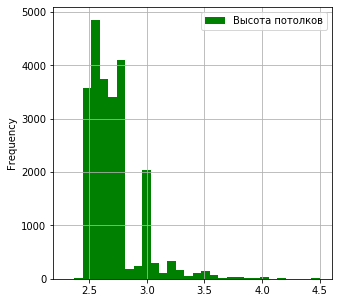

In [15]:
# построим гистограммы

df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, color = 'g', figsize = (5,3), range = (0,300))
plt.legend(['Общая площадь квартиры'])

df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, color = 'g', figsize = (5,5), range = (0,20000000))
plt.legend(['Стоимость квартиры'])

df.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, color = 'g', figsize = (5,4), range = (0,8))
plt.legend(['Количество комнат'])

df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, color = 'g', figsize = (5,5), range = (2.3,4.5))
plt.legend(['Высота потолков'])

**Вывод**  
* Основная часть квартир имеет метраж от `30м²` до `80м²`, медианное значение `52м²`. Есть выбросы до `900м²`;
* Средняя стоимость квартиры лежит в промежутке от `2.5млн` до `11млн`. , медианное значение `4.65млн`. Есть вызывающие вопросы значения в минимуме: `12тыс`, - слишком небольшая цена для квартиры. К максимальным значениям вопросов меньше;
* Превалирующее большинство квартир имеет от одной до трёх комнат, дальше идёт резкий спад. Без комнат могут быть студии, есть максимальное значение в `19` комнат;
* Высота потолков распределена от `2.5м` до `3,2м`, медиана: `2.65м`. Есть минимальные и максимальные выбросы.

### Время продажи квартиры.
Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Сделаем выводы.

In [16]:
# посмотрим описательную статистику, посчитаем медиану
display(df['days_exposition'].describe())
df['days_exposition'].median()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

95.0

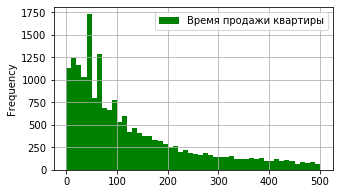

In [17]:
# построим гистограмму
df.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, color = 'g', figsize = (5,3), range = (0,500))
plt.legend(['Время продажи квартиры'])

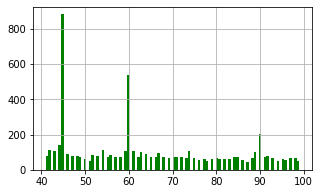

In [18]:
# посмотрим на выбивающиеся пики значений
df.query('40<days_exposition<100')['days_exposition'].hist(bins=100, color = 'g', figsize=(5,3))

In [19]:
# посмотрим на количество выбивающихся значений
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

**Вывод**  

* Среднее время продажи квартиры: `169` дней;
* Медианное время продажи квартиры: `95` дней;
* Есть значения в несколько лет;
* Есть аномалии в `45`, `60` и `95` дней, вероятнее всего, объявления автоматически удаляются с площадки, в дальнейшем анализе это нужно будет учесть.

### Редкие и выбивающиеся значения.
Уберём редкие и выбивающиеся значения.

In [20]:
# удалим ранее обнаруженные аномалии в столбце с временем продажи квартиры
df = df.query('days_exposition not in [45, 60, 95]')
display(df['days_exposition'].describe())
df['days_exposition'].median()

count    19916.000000
mean       184.430257
std        222.055814
min          1.000000
25%         44.000000
50%        100.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

100.0

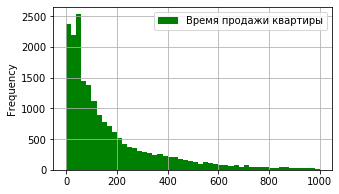

In [21]:
# # построим гистограмму
df.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, color = 'g', figsize = (5,3), range = (0,1000))
plt.legend(['Время продажи квартиры'])

In [22]:
# удалим выбивающиеся значения в площади квартир, ограничим от 10 до 350м²
df = df.query('10 <= total_area <= 350')
display(df['total_area'].describe())

count    23056.000000
mean        59.651338
std         31.717581
min         12.000000
25%         40.000000
50%         51.800000
75%         69.400000
max        347.500000
Name: total_area, dtype: float64

In [23]:
# удалим выбивающиеся значения в стоимости квартир, ограничим до 20млн
df = df.query('last_price <= 20000000')
display(df['last_price'].describe())

count    2.239000e+04
mean     5.408318e+06
std      3.247527e+06
min      1.219000e+04
25%      3.370000e+06
50%      4.500000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64

In [24]:
# удалим выбивающиеся значения в числе комнат, ограничим до 
df = df.query('rooms not in [12]')
display(df['rooms'].describe())

count    22390.000000
mean         2.006521
std          0.988139
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [25]:
# удалим выбивающиеся значения в высоте потолков, ограничим до 3.75м
df = df.query('ceiling_height <= 3.75')
display(df['ceiling_height'].describe())

count    22262.000000
mean         2.689807
std          0.197947
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          3.750000
Name: ceiling_height, dtype: float64

**Вывод**  

Убрали выбивающиеся значения в столбце с временем продажи квартиры. Вероятнее всего, после `45`, `60` и `95` дней, объявления автоматически удаляются на площадке, либо заканчивается оплаченный период размещения коммерческих объявлений, либо что-то аналогичное. Для корректного дальнейшего анализа, эти значения были удалены. Медиана, среднее и квартили изменились, распределение данных стало похожим на распределение Пуассона.
Убрали аномальные значения в столбцах:
* `total_area`: от 10 до 350м²;
* `last_price`: до 2млн; 
* `rooms`: убрали выброс с двенадцатикомнатной квартирой;
* `ceiling_height`: до 3.75м.

### Факторы, влияющие на стоимость квартиры
Изучим, зависит ли цена от площади, числа комнат, удалённости от центра; зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом; зависимость от даты размещения: дня недели, месяца и года.

Добавим несколько категориальных столбцов.

In [26]:
# добавим категориальный столбец площади квартиры
def total_area_id(row):
    if row['total_area'] < 30:
        return 'до 30м²'
    elif 30 <= row['total_area'] <= 50:
        return '30-50м²'
    elif 50 <= row['total_area'] <= 70:
        return '50-70м²'
    elif row['total_area'] > 70:
        return 'более 70м²' 
df['total_area_id'] = df.apply(total_area_id, axis=1)
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sqft,weekday_exposition,month_exposition,year_exposition,floors_id,living_area_ratio,kitchen_area_ratio,total_area_id
15076,11,3900000,43.0,2016-12-18,2,2.55,5.0,28.0,2,NaN,...,NaN,401.0,90697,6,12,2016,другой,0.651163,0.127907,30-50м²
12424,20,4280000,45.9,2018-03-22,2,2.50,9.0,29.6,3,NaN,...,NaN,13.0,93246,3,3,2018,другой,0.644880,0.172113,30-50м²
13859,12,10650000,94.0,2016-05-19,4,2.60,14.0,NaN,8,NaN,...,506.0,288.0,113297,3,5,2016,другой,NaN,NaN,более 70м²
3763,10,3400000,63.0,2017-07-29,3,2.55,5.0,45.0,4,NaN,...,NaN,34.0,53968,5,7,2017,другой,0.714286,0.103175,50-70м²
14167,6,3500000,30.8,2019-02-14,1,2.50,5.0,17.4,5,NaN,...,560.0,9.0,113636,3,2,2019,последний,0.564935,0.178571,30-50м²


Для категориального столбца по расстонияю до центра города, возьмём данные из [Википедии](https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD_(%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3)):
> "Протяжённость Петербурга в административных границах: с севера на юг в пределах КАД — 32 км (за пределами КАД — 52 км), с северо-запада на юго-восток за пределами КАД,— около 90 км."

Добавим дополнительно категории с учётом исторического центра и "золотого треугольника", получим категории: Центральный район (0-3км), основная часть города (3-5км), транспортная доступность (метро) и с севера на юг в пределах КАД (5-16км), с севера на юг за пределами КАД (16-26км),  северо-запада на юго-восток за пределами КАД (более 45км):
* 0-3км от центра (до 3км);
* 3-5км от центра (3-5км);
* 5-10км от центра (5-10км);
* 10-16км от центра (10-16км);
* 16-26км от центра (16-26км);
* 26-45км от центра (26-45км);
* более 45км от центра (более 45км).

In [27]:
# добавим категориальный столбец удалённости от центра
# для удобства будем считать в километрах и переведём в целые, создадим под это новый столбец
df['city_centers_nearest_km'] = round((df['city_centers_nearest']/1000),0)
def city_centers_nearest_id(row):
    if row['city_centers_nearest_km'] < 3:
        return 'до 3км'
    elif 3 <= row['city_centers_nearest_km'] <= 5:
        return '3-5км'
    elif 5 <= row['city_centers_nearest_km'] <= 10:
        return '5-10км'
    elif 10 <= row['city_centers_nearest_km'] <= 16:
        return '10-16км' 
    elif 16 <= row['city_centers_nearest_km'] <= 26:
        return '16-26км'
    elif 26 <= row['city_centers_nearest_km'] <= 45:
        return '26-45км'
    elif row['city_centers_nearest_km'] > 45:
        return 'более 45км'
df['city_centers_nearest_km_id'] = df.apply(city_centers_nearest_id, axis=1)
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_sqft,weekday_exposition,month_exposition,year_exposition,floors_id,living_area_ratio,kitchen_area_ratio,total_area_id,city_centers_nearest_km,city_centers_nearest_km_id
11705,5,3380000,26.0,2018-02-20,0,2.80,17.0,17.0,8,NaN,...,130000,1,2,2018,другой,0.653846,NaN,до 30м²,8.0,5-10км
2478,1,4000000,39.0,2018-02-08,2,3.10,5.0,25.9,1,NaN,...,102564,3,2,2018,первый,0.664103,0.138462,30-50м²,1.0,до 3км
6861,20,13990000,100.0,2019-04-29,3,2.70,16.0,60.0,13,NaN,...,139900,0,4,2019,другой,0.600000,NaN,более 70м²,13.0,10-16км
8311,9,3700000,64.0,2019-04-28,3,2.60,7.0,36.0,4,NaN,...,57812,6,4,2019,другой,0.562500,0.148438,50-70м²,NaN,None
20012,1,3900000,45.0,2016-11-11,1,2.65,12.0,19.0,5,False,...,86666,4,11,2016,другой,0.422222,0.255556,30-50м²,15.0,10-16км


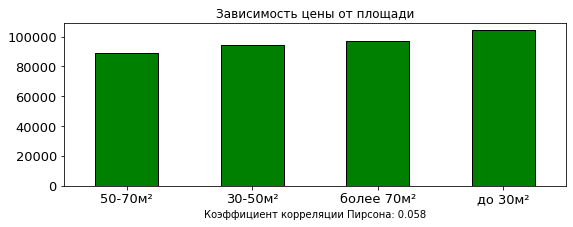

In [28]:
# посмотрим на корреляцию между факторами
# напишем функцию построения графиков зависимостей
# график зависимостей цены квартиры от площади и коэффициент корреляции
def graph_plot(data_column, table_name):
    
    plot = df.pivot_table(index = data_column, values = 'price_sqft', aggfunc = 'median').reset_index(
    ).sort_values(by='price_sqft').plot(x=data_column, y='price_sqft', kind='bar',
                                       color = 'g', ec='black', legend=None, title=table_name,
                                       fontsize=13, figsize=(9,3))
       
    if data_column == 'total_area_id':     
        corrp = round(df['total_area'].corr(df['price_sqft']), 3)
    elif data_column == 'floors_id':
        corrp = round(df['floor'].corr(df['price_sqft']), 3)
    elif data_column == 'city_centers_nearest_km_id':
        corrp = round(df['city_centers_nearest'].corr(df['price_sqft']), 3)
    else:
        corrp = round(df[data_column].corr(df['price_sqft']), 3)
    plot.set_xlabel(f'Коэффициент корреляции Пирсона: {corrp}')    
    
    plt.xticks(rotation=0)

    return plot

graph_plot('total_area_id', 'Зависимость цены от площади')

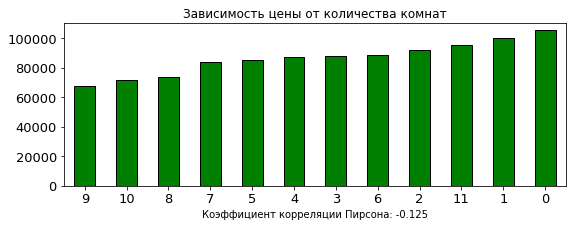

In [29]:
# график зависимостей цены квартиры от количества комнат и коэффициент корреляции 
graph_plot('rooms', 'Зависимость цены от количества комнат')

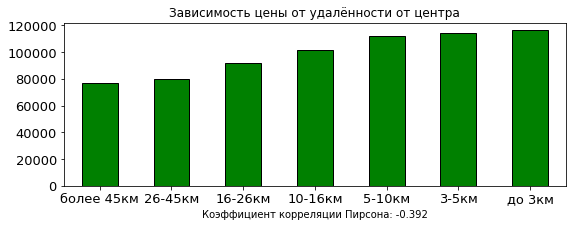

In [30]:
# график зависимостей цены квартиры от удалённости от центра и коэффициент корреляции 
graph_plot('city_centers_nearest_km_id', 'Зависимость цены от удалённости от центра')

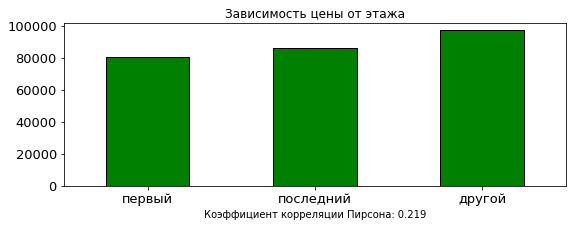

In [31]:
# график зависимостей цены квартиры от этажа и коэффициент корреляции 
graph_plot('floors_id', 'Зависимость цены от этажа')

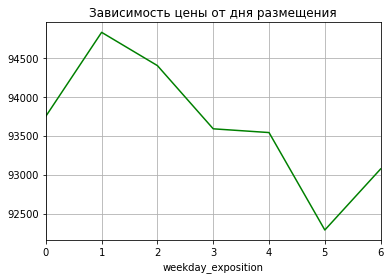

In [32]:
# график зависимостей цены квартиры от дня размещения
df.pivot_table(index = 'weekday_exposition',
               values = 'price_sqft',
               aggfunc = 'median').reset_index().plot(x='weekday_exposition', grid=True,
                                                      color = 'g', legend=None, title='Зависимость цены от дня размещения')

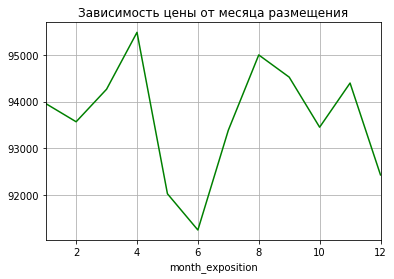

In [33]:
# график зависимостей цены квартиры от месяца размещения
df.pivot_table(index = 'month_exposition',
               values = 'price_sqft',
               aggfunc = 'median').reset_index().plot(x='month_exposition',
                                                      color = 'g', grid=True, legend=None,
                                                      title='Зависимость цены от месяца размещения')

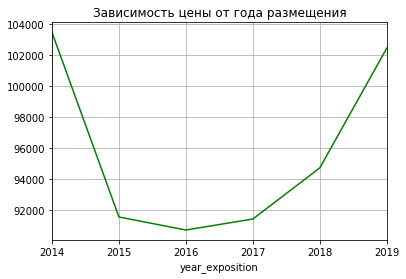

In [34]:
# график зависимостей цены квартиры от года размещения
df.pivot_table(index = 'year_exposition',
               values = 'price_sqft',
               aggfunc = 'median').reset_index().plot(x='year_exposition',
                                                      color = 'g', legend=None, grid=True,
                                                      title='Зависимость цены от года размещения')

**Вывод**  

* Зависимость цены от площади наблюдается: коэффициент Пирсона `0,3`, самая небольшая стоимость квадратного метра у квартир в `50-70м²`, самая высокая у квартир с метражом `до 30м²`;
* Зависимость цены от количества комнат если и есть, то нелинейная: коэффициент Пирсона `0,059`, самые недорогие квартиры с `14`-ю комнатами, затем есть значения похожие на выбросы, например, самая высокая стоимость у `12`-ти комнатной квартиры;
* Зависимость цены от удалённости от центра города наблюдается: коэффициент Пирсона `-0,3`, стоимость равномерно понижается от центра к окраинам;
* Зависимость цены от этажа: коэффициент Пирсона `0,125` , самые недорогие квартиры на первом этаже, посередине на последнем и самые дорогие между ними;
* Зависимость цены от дня размещения: меньше всего цена в субботу, чуть выше в воскресение, но при этом и общее количество объявлений в выходные дни меньше;
* Зависимость цены от месяца размещения: самые недорогие предложения появляются в июне и апреле, самые дорогие в августе, марте, но и количество объявлений в летние месяцы меньше: от `700` в летние и более `1400` в феврале, ноябре;
* Зависимость цены от года размещения: спад после 2014 года до 2016, затем плато, равноускоренный рост с 2017 до 2018, затем подъём до 2019 года, но количество объявлений увеличивалось до 2018 года, затем достаточно резкое снижение количества предложений в несколько раз.


###  Средняя стоимость квадратного метра
Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [35]:
# напечатаем таблицу со средним по цене квадратного метра в топ-10 городов по количеству объявлений
top_ten_list_city_ads = df['locality_name'].value_counts().index.tolist()[:10]
mean_city_sqft = [df[df['locality_name'] == name]['price_sqft'].mean(
                  ).astype('int') for name in top_ten_list_city_ads]
pd.DataFrame({'Город': top_ten_list_city_ads,'Средняя цена м²': 
              mean_city_sqft}).sort_values(by='Средняя цена м²', ascending=False).reset_index(drop=True)




,Город,Средняя цена м²
0,Санкт-Петербург,108554
1,Пушкин,101761
2,деревня Кудрово,92422
3,посёлок Парголово,90194
4,посёлок Мурино,85643
5,посёлок Шушары,78530
6,Колпино,75504
7,Гатчина,68719
8,Всеволожск,66983
9,Выборг,57912


In [36]:
# напечатаем таблицу со средним по цене квадратного метра в топ-10 городов по количеству объявлений
df.pivot_table(index = 'locality_name',
               values = 'price_sqft', aggfunc = ('count',
                                                 'mean')).reset_index().sort_values(by='count',
                                                                                    ascending=False).head(10)


,locality_name,count,mean
33,Санкт-Петербург,14478.0,108554.428167
289,посёлок Мурино,507.0,85643.459566
324,посёлок Шушары,427.0,78530.971897
3,Всеволожск,386.0,66983.448187
32,Пушкин,350.0,101761.048571
13,Колпино,327.0,75504.880734
294,посёлок Парголово,314.0,90194.203822
6,Гатчина,297.0,68719.632997
93,деревня Кудрово,287.0,92422.519164
4,Выборг,231.0,57912.017316


**Вывод**  

* Населённый пункт с самой высокой стоимостью жилья: Санкт-Петербург `112849` за `м²`;
* Населённый пункт с самой низкой стоимостью жилья: Выборг `56887` за `м²`.

### Квартиры в центре Санкт-Петербурга
Выделим квартиры в центре Санкт-Петербурга, выясним, какая область входит в центр города. Посчитаем среднюю цену для каждого километра. Построим график. Определим центральную зону города.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

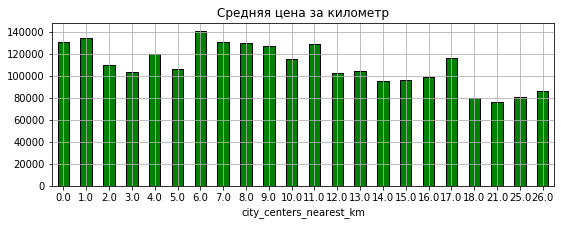

In [37]:
# сгруппируем квартиры по городу Санкт-Петербург, поссчитаем среднюю цену для каждого километра
# построим график средней цены за квадратный метр каждого километра от центра Санкт-Петербурга

df.query('locality_name == "Санкт-Петербург"'
        ).dropna().pivot_table(index = 'city_centers_nearest_km',
                               values = 'price_sqft',
                               aggfunc = 'mean').plot(kind='bar',
                                                      grid=True, color = 'g', ec='black',
                                                      legend=None, title='Средняя цена за километр', figsize=(9,3))
plt.xticks(rotation=0)

**Вывод**  

По получившимся данным, сложно выделить какой-то обособленный центр, т.к. распределение неравномерное, средняя стоимость на расстоянии в `3-4км` меньше стоимости на расстоянии в `11км`, на `8км` дороже чем в `1км` от центра и тому подобное.
Вероятнее всего, за счёт рельефа местности (рек, залива, мостов), стоимость квартир больше привязана именно к рельефу, элитной застройке и каким-либо историческим данным, и меньшим образом привязана к удалённости от центра.
Поэтому, если считать центр города по безусловной стоимости квартир за квадратный метр - выигрывает область с радиусом в `1км`, со средней стоимостью квартиры за квадратный метр в `250000`.  
Но для удобства, будем считать область с радиусом в `8км`, на следующих километрах идёт всё же спад, хотя и со всплесками.   
(Тем более, что, например, в Москве: Садовое кольцо находится в радиусе `3км`, ТТК `5км`, незаконченная СВХ `9км` и МКАД до `20км`).

### Анализ сегмента квартир в центре
Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сравним с данными по всей базе.

In [38]:
# выделим сегмент квартир в центре Санкт-Петербурга
# посмотрим описательную статистику
df_spb_center = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km <= 8')
round(df_spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe(),2)

,total_area,last_price,rooms,ceiling_height
count,3345.00,3345.00,3345.00,3345.00
mean,75.94,8983880.07,2.55,2.90
std,33.76,3881219.31,1.21,0.29
min,12.00,1600000.00,0.00,2.00
25%,51.00,6040000.00,2.00,2.66
50%,70.00,8200000.00,2.00,2.90
75%,93.00,11315000.00,3.00,3.05
max,287.50,20000000.00,11.00,3.75


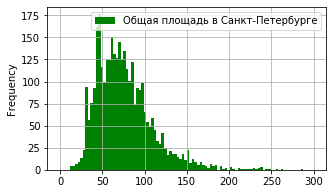

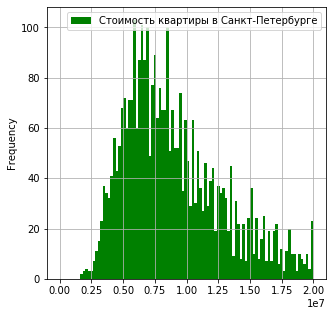

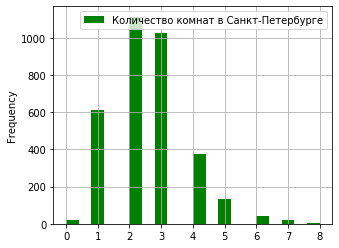

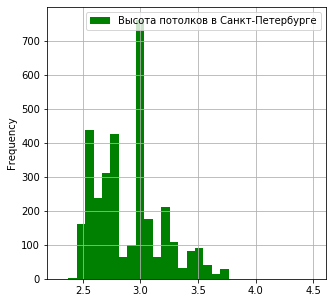

In [39]:
# построим гистограммы
df_spb_center.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, color = 'g', figsize = (5,3), range = (0,300))
plt.legend(['Общая площадь в Санкт-Петербурге'])

df_spb_center.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, color = 'g', figsize = (5,5), range = (0,20000000))
plt.legend(['Стоимость квартиры в Санкт-Петербурге'])

df_spb_center.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, color = 'g', figsize = (5,4), range = (0,8))
plt.legend(['Количество комнат в Санкт-Петербурге'])

df_spb_center.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, color = 'g', figsize = (5,5), range = (2.3,4.5))
plt.legend(['Высота потолков в Санкт-Петербурге'])

* Основная часть квартир имеет метраж от `53м²` до `104м²`, медианное значение `86м²`. Минимальная площадь `12м²`, максимальная `900м²`. В сравнении со всей базой, средняя площадь в городе выше на `14м²`;
* Средняя стоимость квартиры лежит в промежутке от `6.2млн` до `13млн`. , медианное значение `13.8млн`. Минимальная стоимость `1.6млн`, максимальная `763млн`. В сравнении с общей базой, средняя стоимость выше на `2млн`;
* Превалирующее большинство квартир имеет две или три комнаты, дальше идёт спад. максимальное количество комнат: `8`, нет принципиальных отличий от общей базы, не считая выбросы;
* Высота потолков распределена от `2.7м` до `3,5м`, медиана: `2.98м`. Есть минимальные и максимальные выбросы. В сравнении с общей базой средняя высота в городе больше на `0.16м`.

Вывод

Основная часть квартир имеет метраж от 30м² до 80м², медианное значение 52м². Есть выбросы до 900м²;
Средняя стоимость квартиры лежит в промежутке от 2.5млн до 11млн. , медианное значение 4.65млн. Есть вызывающие вопросы значения в минимуме: 12тыс, - слишком небольшая цена для квартиры. К максимальным значениям вопросов меньше;
Превалирующее большинство квартир имеет от одной до трёх комнат, дальше идёт резкий спад. Без комнат могут быть студии, есть максимальное значение в 19 комнат;
Высота потолков распределена от 2.5м до 3,2м, медиана: 2.65м. Есть минимальные и максимальные выбросы.

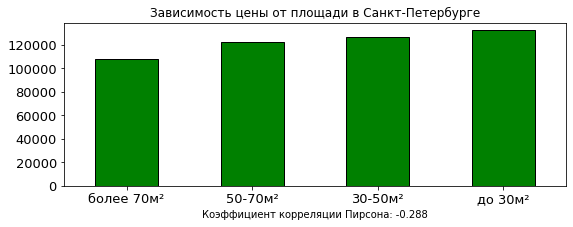

In [40]:
# напишем функцию построения графиков зависимостей в Санкт-Петербурге
def graph_plot_spb(data_column, table_name):
    
    plot = df_spb_center.pivot_table(index = data_column, values = 'price_sqft', aggfunc = 'median').reset_index(
    ).sort_values(by='price_sqft').plot(x=data_column, y='price_sqft', kind='bar',
                                       color = 'g', ec='black', legend=None, title=table_name,
                                       fontsize=13, figsize=(9,3))
       
    if data_column == 'total_area_id':     
        corrp = round(df_spb_center['total_area'].corr(df_spb_center['price_sqft']), 3)
    elif data_column == 'floors_id':
        corrp = round(df_spb_center['floor'].corr(df_spb_center['price_sqft']), 3)
    elif data_column == 'city_centers_nearest_km_id':
        corrp = round(df_spb_center['city_centers_nearest'].corr(df_spb_center['price_sqft']), 3)
    else:
        corrp = round(df_spb_center[data_column].corr(df_spb_center['price_sqft']), 3)
    plot.set_xlabel(f'Коэффициент корреляции Пирсона: {corrp}')    
    
    plt.xticks(rotation=0)

    return plot

graph_plot_spb('total_area_id', 'Зависимость цены от площади в Санкт-Петербурге')

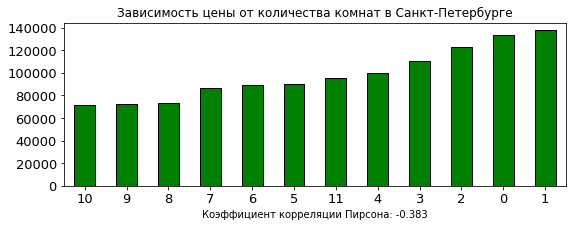

In [41]:
# график зависимостей цены квартиры от количества комнат и коэффициент корреляции 
graph_plot_spb('rooms', 'Зависимость цены от количества комнат в Санкт-Петербурге')

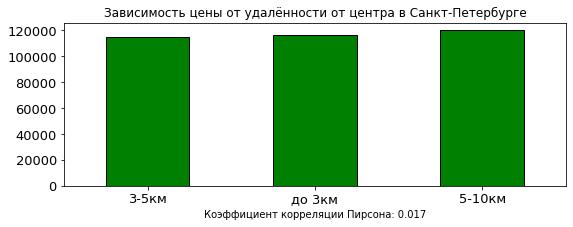

In [42]:
# график зависимостей цены квартиры от удалённости от центра и коэффициент корреляции 
graph_plot_spb('city_centers_nearest_km_id', 'Зависимость цены от удалённости от центра в Санкт-Петербурге')

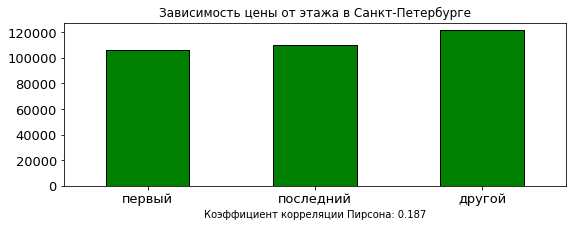

In [43]:
# график зависимостей цены квартиры от этажа и коэффициент корреляции 
graph_plot_spb('floors_id', 'Зависимость цены от этажа в Санкт-Петербурге')

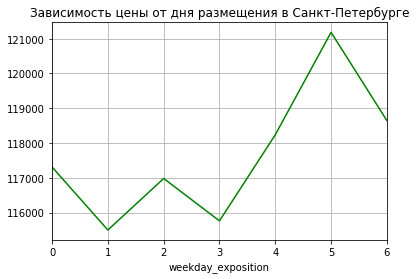

In [44]:
# график зависимостей цены квартиры от дня размещения в Санкт-Петербурге
df_spb_center.pivot_table(index = 'weekday_exposition',
               values = 'price_sqft',
               aggfunc = 'median').reset_index().plot(x='weekday_exposition',
                                                      grid=True, color = 'g', legend=None,
                                                      title='Зависимость цены от дня размещения в Санкт-Петербурге')

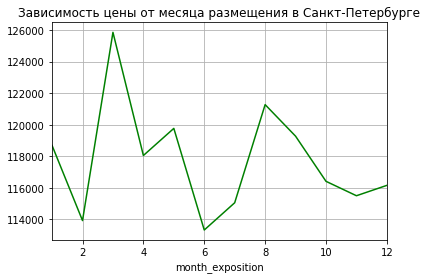

In [45]:
# график зависимостей цены квартиры от дня размещения в Санкт-Петербурге
df_spb_center.pivot_table(index = 'month_exposition',
               values = 'price_sqft',
               aggfunc = 'median').reset_index().plot(x='month_exposition',
                                                      grid=True, color = 'g', legend=None,
                                                      title='Зависимость цены от месяца размещения в Санкт-Петербурге')

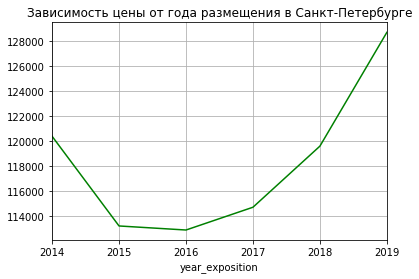

In [46]:
# график зависимостей цены квартиры от дня размещения в Санкт-Петербурге
df_spb_center.pivot_table(index = 'year_exposition',
               values = 'price_sqft',
               aggfunc = 'median').reset_index().plot(x='year_exposition',
                                                      grid=True, color = 'g', legend=None,
                                                      title='Зависимость цены от года размещения в Санкт-Петербурге')

**Вывод**  

Санкт-Петербург:
* Зависимость цены от площади наблюдается: коэффициент Пирсона `0,291`, чем больше площадь, тем дешевле стоимость;
* Зависимость цены от количества комнат если и есть, то нелинейная (либо имеют большое значение артефакты): коэффициент Пирсона `0,039`, самые недорогие квартиры с `14`-ю комнатами, затем есть значения похожие на выбросы, например, самая высокая стоимость у `12`-ти комнатной квартиры. Почти одинаковая стоимость у студий, однокомнатных и двухкомнатных квартир;
* Зависимость цены от удалённости от центра города невысокая, но есть: коэффициент Пирсона `-0,043`, самые дешёвые предложения в радиусе `3-5км`, самые дорогие `5-10км`;
* Зависимость цены от этажа: коэффициент Пирсона `0,13` , самые недорогие квартиры на первом этаже, посередине на последнем и самые дорогие между ними;
* Зависимость цены от дня размещения : самые недорогие в четверг, самые дорогие в субботу, причём наибольшее количество обявлений размещается в четверг (более `500`), меньше всего в выходные дни (менее `150`);
* Зависимость цены от месяца размещения: самые недорогие предложения появляются в апреле, самые дорогие в марте (но медиана и среднее сильно различаются, что может указывать на присутствие выбросов), причём наименьшее количество объявлений размещается в мае, наибольшее в феврале, ноябре;
* Зависимость цены от года размещения: рост до 2015 года, затем уменьшение скорости роста и всплеск с 2018 года, при этом количество предложений стало сокращаться начиная с 2017 года и более резко уменьшаться с 2018 года.


Делая сравнение с данными по всей базе, можно заключить:  
* Средняя площадь квартир в Санкт-Петербурге больше общей почти в полтора раза, самая маленькая и самая большая площадь находятся в Санкт-Петербурге. Площадь квартиры влияет на цену, чем меньше площадь, тем дороже квадратный метр;
* Средняя стоимость квартир в Санкт-Петербурге больше общей почти в три раза, само распределение стоимости в Санкт-Петербурге более равномерное;
* В Санкт-Петербурге преобладают многокомнатные квартиры, в том числе есть максимальное значение в `19` комнат. Количество комнат незначительно влияет на цену, самые дорогие это студии и однокомнатные;
* Высота потолков в Санк-Петербурге, в среднем выше, само распределение более равномерное чем в общей базе, но есть выбросы, как, например, максимальное значение в `100м`;
* В Санкт-Петербурге и во всей базе зависимость по удалённости от центра города различается. Наиболее дорогие предложения в радиусе `5-8км` и в радиусе менее `1км` от центра города;
* Этажность одинаково влияет на стоимость во всех случаях: самые недорогие квартиры на первом этаже, посередине на последнем и самые дорогие между ними;
* Зависимости от дня недели: самый "недорогой" день в Санкт-Петербурге - четверг, по всей базе - суббота, но везде в выходные дни количество объявлений падает;
* Зависимость цены от месяца размещения: самые недорогие предложения появляются в апреле, самые дорогие в марте, - совпадает в городе и всей базе;
* Зависимость цены от года размещения: спад роста стоимости после 2014 года до 2016, затем рост до 2018 года совпадает со всей базой, как и резкое сокращение предложений, что может влиять на рыночное ценообразование (не исключая внешние процессы, как экономический кризис и пр.).

## Общий вывод

В процессе обработки данных были удалены аномальные значение, которые могут быть связаны с автоматической работой системы удаления объявлений после определённого срока: `45`, `60` и `95` дней.
Средняя стоимость квадратного метра в Санкт-Петербурге выше, чем за его пределами, почти в полтора раза.
На стоимость квартиры влияет площадь: `коэффициент корреляции Пирсона 0.3`, количество комнат, этажность: `коэффициент корреляции Пирсона 0.13`, близость к центру города `коэффициент корреляции Пирсона 0.318`. Почти не имеет влияния дата размещения объявления, но, в 2014 году, были самые высокие стоимости, после которого идёт резкий спад и даже небольшой рост в 2019 году не достигает уровня 2014 года, что можно связать с внешнеэкономическими/политическими процессами.